# face recognition with LBPH and OpenCV

- LBPH = local binary patterns histogram

consider a matrix:
12 15 18
5 8 3
8 1 2

consider the central pixel 8

then apply this condition:
if the vlaue is >= 8 set 1
else set 0

so the matrix becomes

1 1 1

0 8 0

1 0 0

that can be rewritten as:

11100010

this can be converted from binary to decimal number = 226


- LBPH has 4 parameters:
  - radius
  - neighbors
  - grid x
  - grid y

- training the algorithm:
  we need to use a dataset with the facial images of the people we want to recognize. We need to set an ID (a number or the name of the person) for each image so the algorithm will use this information to recognize an input image and give you an output.

- apply the LBP operation:
   the first computational step of the LBPH is to create an intermediate image that describes the original image in a better way, by highlighting the facial characteristics. To do so, the algorithm uses a concept of a sliding window, based on the parameters radius and neighbors.


- so as we said before, we take a 3x3 image, we take the central pixel as threshold, we compute the binary condition for each neighbor pixel, we concatenate the 0,1s, then convert the binary pixel to decimal and set it in the central pixel. repeat this procedure to get a new image which represents better the characteristics of the original image.

- then extract the histograms:
we use the grid x and grid y parameters to divide the image into multiple grids, for each region from the grid extract the histogram of the region.

- then we concatenate each histogram to create a new and bigger histogram. suppose we have 8x8 grids, we will have 8x8x256 = 16384 positions in the final histogram. this final histogram represents the characteristics of the image.
- performing the face recognition: in this step, the algorithm is already trained. Each histogram created is used to represent each image from the training dataset. So, given an input image, we perform the steps again for this new image and created ahistogram which represents the image.

- so to findthe image that matches the input image we just need to compare two histograms and return the image with the closest histogram

- we can use various approaches to compare the histograms (calculate the distance between two histograms)
for example: Euclidean distance, chi-square, absolute value ecc.

- so the algorithm output is the ID from the image with the closest histogram. the algorithm should also return the calculated distance, which can be used as a confidence measurement.
- we can then use a threshold and the confidence to automatically estimate if the algorithm has correctly recognized the image.

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'

zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject05.leftlight.gif', 'subject13.surprised.gif', 'subject13.leftlight.gif', 'subject10.surprised.gif', 'subject05.wink.gif', 'subject01.noglasses.gif', 'subject12.leftlight.gif', 'subject06.surprised.gif', 'subject07.sad.gif', 'subject07.wink.gif', 'subject06.wink.gif', 'subject09.glasses.gif', 'subject04.normal.gif', 'subject02.normal.gif', 'subject11.sleepy.gif', 'subject05.rightlight.gif', 'subject13.normal.gif', 'subject14.happy.gif', 'subject06.sad.gif', 'subject05.centerlight.gif', 'subject15.surprised.gif', 'subject15.noglasses.gif', 'subject03.sad.gif', 'subject05.sad.gif', 'subject05.normal.gif', 'subject05.happy.gif', 'subject01.sleepy.gif', 'subject14.surprised.gif', 'subject12.noglasses.gif', 'subject03.normal.gif', 'subject13.wink.gif', 'subject10.wink.gif', 'subject13.rightlight.gif', 'subject04.glasses.gif', 'subject15.happy.gif', 'subject13.noglasses.gif', 'subject14.sleepy.gif', 'subject09.wink.gif', 'subject08.surprised.gif', 'subject14.centerlight.gif', 'subjec

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]

  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    ids.append(id)
    faces.append(image_np)
  return np.array(ids),faces
ids, faces = get_image_data()

In [ ]:
ids

array([10,  2,  2,  8, 11, 11, 14,  2,  5,  7,  1, 10, 15, 14,  8, 13, 11,
       13,  1, 15,  4, 15,  9,  2,  6,  3, 15,  6,  8,  9, 11, 15, 14, 11,
       14,  6, 13,  9,  6, 14,  3, 13, 15,  2,  2,  6,  5,  5, 11,  3,  9,
        7,  8,  1,  1,  3,  2, 10, 15,  4,  2, 12,  9,  4,  8,  5,  7, 10,
        5, 12,  5,  6, 14, 13, 11,  6, 12,  8,  7,  9,  3,  7, 13, 11,  3,
       15,  7,  9,  1, 10, 12,  5,  7, 12, 10, 14,  3,  3,  8,  5,  9, 11,
        1, 12, 12,  7, 10,  8,  9, 13,  6, 14,  4,  3,  6,  4, 12, 10, 13,
       10,  7, 15,  2,  1,  8,  4,  4, 12, 13,  4,  5,  1,  4, 14,  1])

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
# test
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')


In [ ]:
test_image = '/content/yalefaces/test/subject10.sad.gif'


In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

10

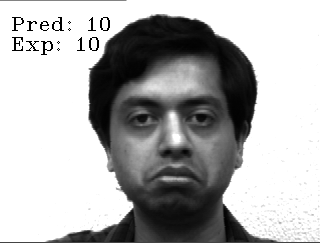

In [ ]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL,1 ,(0,255,0) )
cv2_imshow(image_np)

In [ ]:
# evaluating the face classifier

paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction = lbph_face_classifier.predict(image_np)
  predictions.append(prediction[0])

  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  expected_outputs.append(expected_output)

print(predictions)
print(expected_outputs)

[3, 7, 4, 9, 1, 4, 15, 5, 6, 7, 9, 11, 8, 11, 7, 14, 13, 1, 13, 14, 14, 4, 9, 10, 5, 12, 4, 9, 12, 5]
[3, 9, 8, 3, 1, 2, 15, 2, 6, 15, 4, 11, 8, 11, 7, 14, 13, 1, 13, 14, 6, 4, 7, 10, 5, 12, 10, 9, 12, 5]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictions)
cm



array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

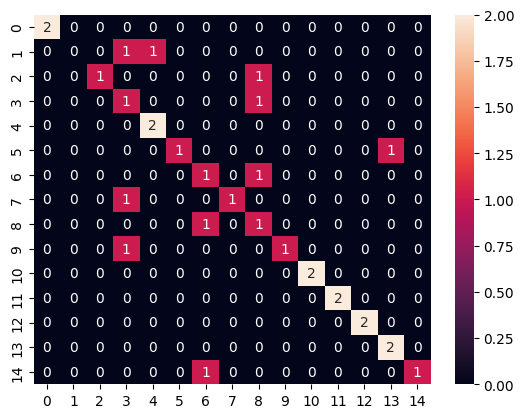

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

# detection of facial points and facial descriptors

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')



In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/people2.jpg')


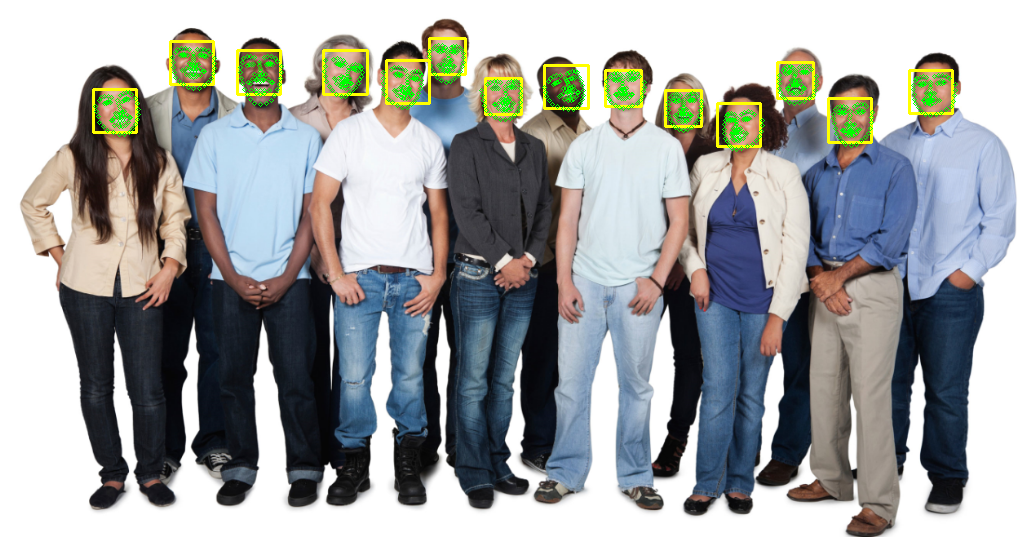

In [ ]:
face_detection = face_detector(image,1)

for face in face_detection:
  l, t , r , b = face.left(), face.top(), face.right(), face.bottom()
  points = points_detector(image, face)

  cv2.rectangle(image, (l,t), (r,b), (0,255,255), 2)

  for point in points.parts():
    cv2.circle(image, (point.x, point.y),2 , (0,255,0),1)

cv2_imshow(image)

# Face recognition with Dlib, CNN and distance calculation

In [ ]:
# detecting facial descriptors

import os

face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')

face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')



In [ ]:
index = {}
idx = 0

face_descriptors = None

paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]

for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t , r , b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l,t), (r,b), (0,0,255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2 , (0,255,0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
    face_descriptor = face_descriptor[np.newaxis, : ]

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor),axis = 0)

    index[idx] = path
    idx +=1

  #cv2_imshow(image_np)

In [ ]:
face_descriptors.shape
#instead of having pixels now we have face descriptors


(132, 128)

In [ ]:
# calculating the distance betweeen faces

np.linalg.norm(face_descriptors[131] - face_descriptors, axis = 1)

array([0.85773004, 0.68505095, 0.54459485, 0.46962745, 0.80957183,
       0.86664598, 0.86849071, 0.69018135, 0.38054389, 0.38033711,
       0.75193724, 0.75956461, 0.82397468, 0.73677387, 0.80493551,
       0.63282729, 0.70019617, 0.75393217, 0.87572934, 0.79722696,
       0.77301883, 0.86011172, 0.85989208, 0.8548072 , 0.8283504 ,
       0.83080076, 0.74832598, 0.89084576, 0.86135102, 0.63089416,
       0.45490939, 0.57527608, 0.77883994, 0.78115006, 0.56909614,
       0.78372232, 0.72149386, 0.83600101, 0.71103395, 0.82397468,
       0.80369895, 0.73698696, 0.63809987, 0.73891524, 0.74254491,
       0.69950719, 0.82446995, 0.37627243, 0.85734541, 0.88158191,
       0.77920376, 0.83181661, 0.77933076, 0.78917058, 0.72540142,
       0.76038524, 0.76145282, 0.78963582, 0.84408934, 0.86648347,
       0.45303903, 0.85160393, 0.8310604 , 0.73677387, 0.66968508,
       0.59492948, 0.748699  , 0.51675638, 0.70984243, 0.55386967,
       0.48436634, 0.63451219, 0.86397919, 0.74598927, 0.71513

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[131] - face_descriptors, axis = 1))

131

detectinf faces with Dlib

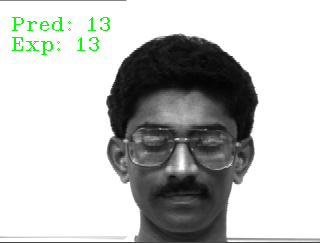

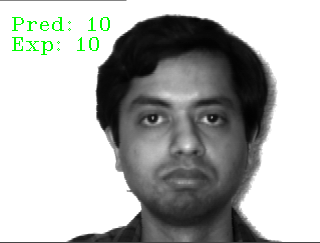

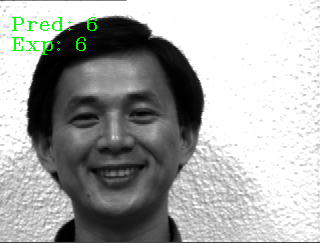

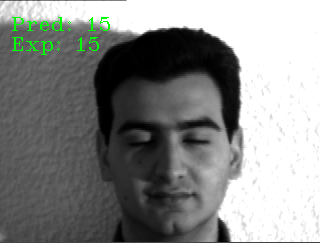

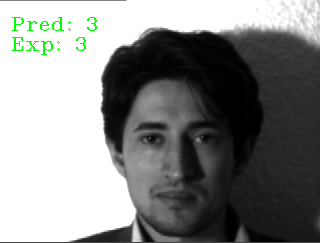

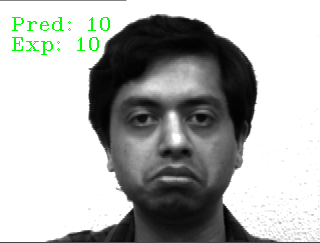

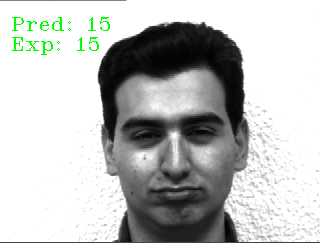

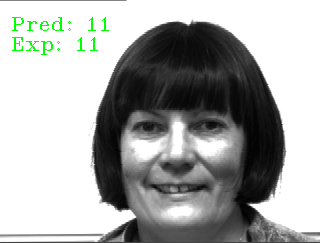

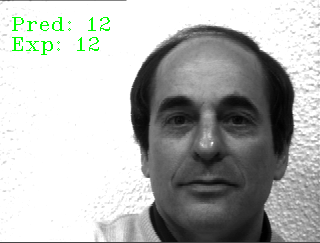

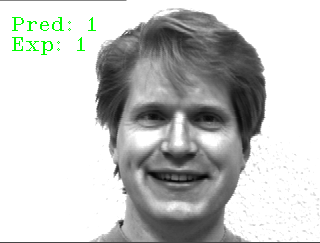

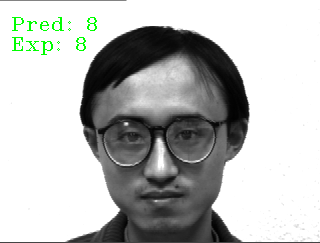

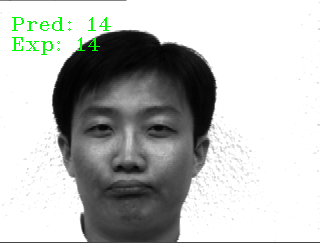

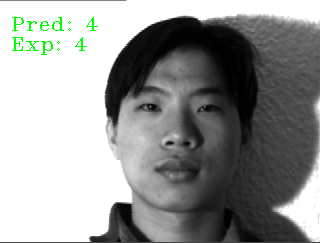

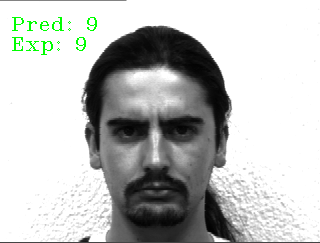

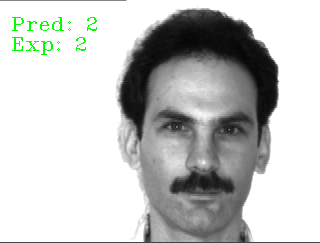

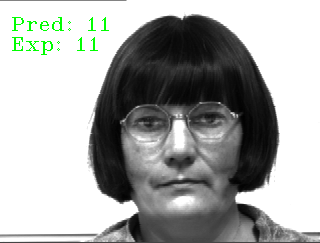

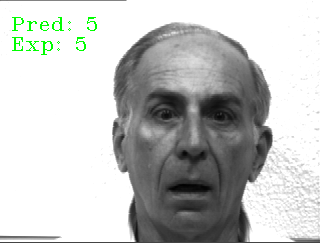

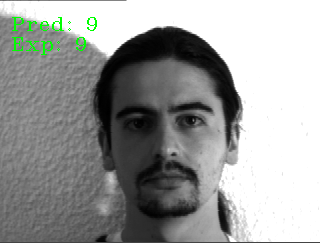

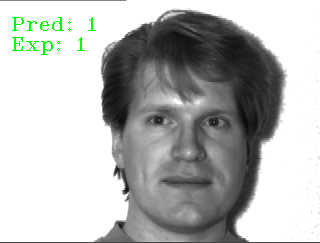

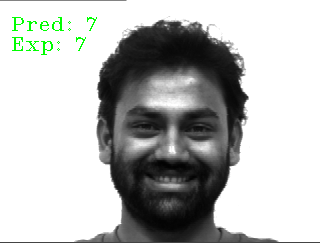

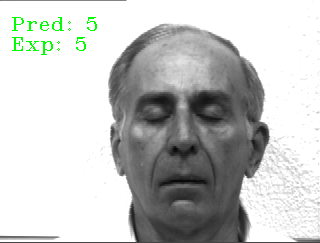

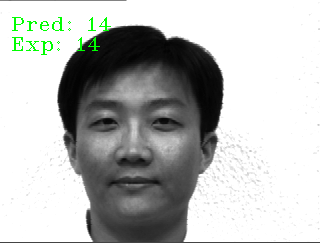

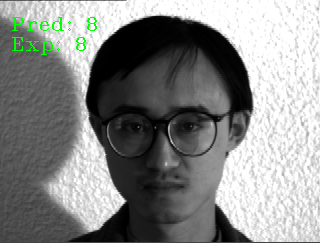

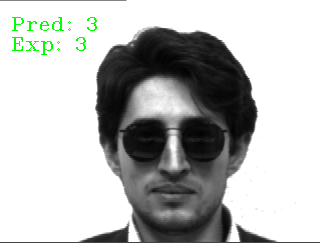

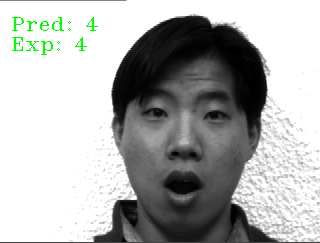

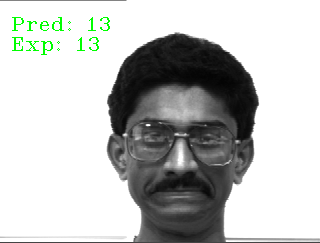

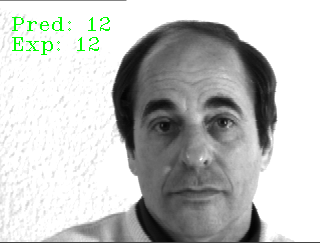

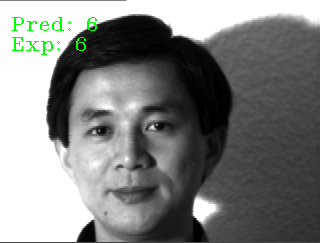

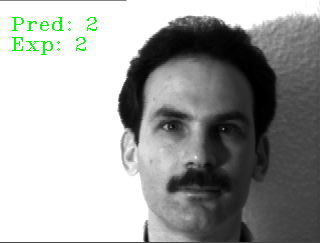

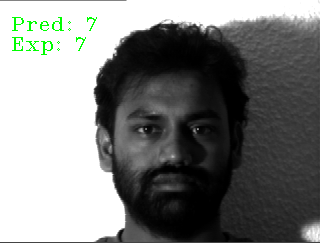

In [ ]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
threshold = 0.5
predictions = []
expected_output = []
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')

  face_detection = face_detector(image_np,1)

  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)

    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    # compare this face_descriptor

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)

    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    predictions.append(name_pred)
    expected_output.append(name_real)
    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1 ,(0,255,0))
    cv2.putText(image_np, 'Exp: ' + str(name_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1 ,(0,255,0))

  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_output = np.array(expected_output)

In [ ]:
predictions, expected_output

(array([13, 10,  6, 15,  3, 10, 15, 11, 12,  1,  8, 14,  4,  9,  2, 11,  5,
         9,  1,  7,  5, 14,  8,  3,  4, 13, 12,  6,  2,  7]),
 array([13, 10,  6, 15,  3, 10, 15, 11, 12,  1,  8, 14,  4,  9,  2, 11,  5,
         9,  1,  7,  5, 14,  8,  3,  4, 13, 12,  6,  2,  7]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, expected_output)

1.0

<Axes: >

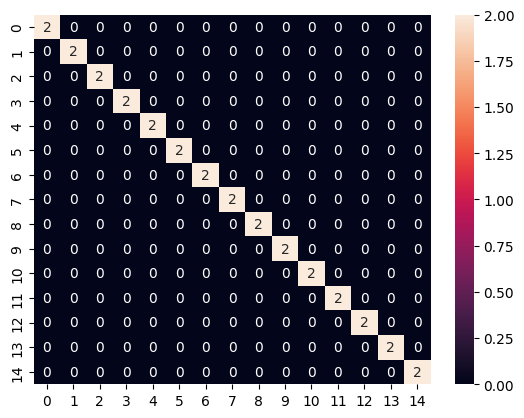

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, expected_output)

sns.heatmap(cm, annot = True)